In [1]:
%%capture
! pip install huggingface_hub

In [2]:
import numpy as np
import keras
from huggingface_hub import from_pretrained_keras
from PIL import Image

In [3]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

In [4]:
low_light_img = Image.open('/content/WhatsApp Image 2025-05-08 at 2.00.42 PM.jpeg').convert('RGB')

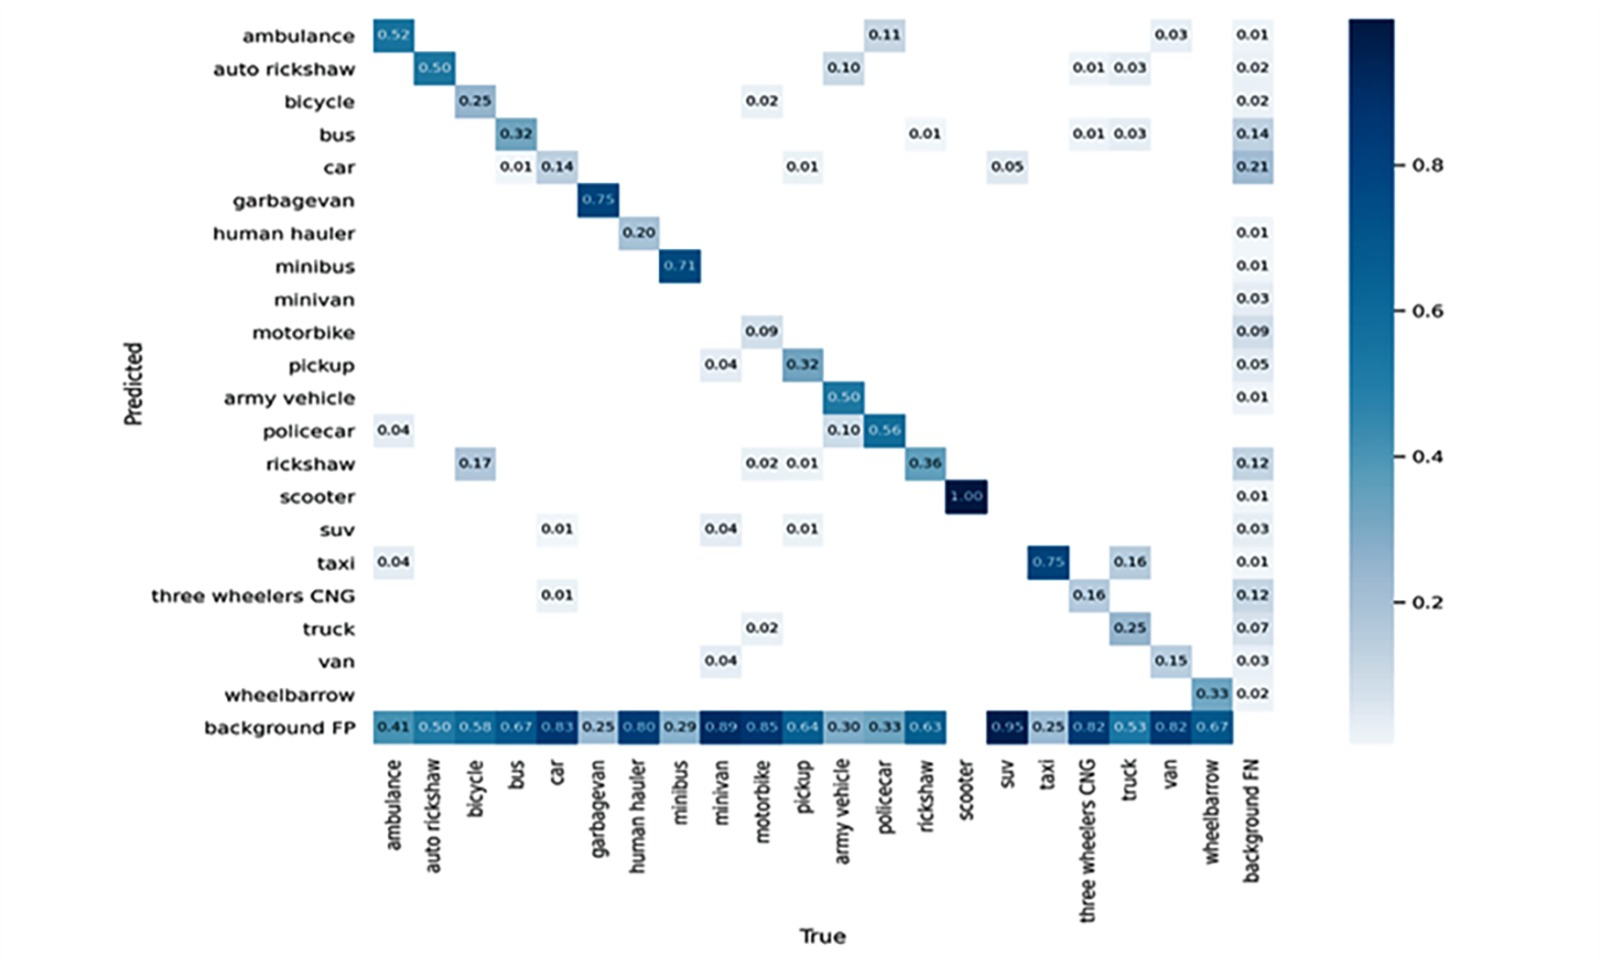

In [5]:
low_light_img

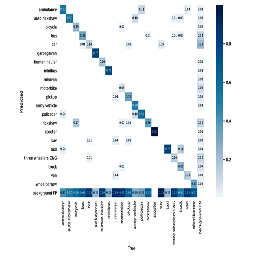

In [6]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)
low_light_img

In [7]:
image = keras.preprocessing.image.img_to_array(low_light_img)
image.shape

(256, 256, 3)

In [8]:
image = image.astype('float32') / 255.0
image.shape

(256, 256, 3)

In [9]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 256, 256, 3)

In [10]:
output= model.predict(image)

1/1 [==============================] - 22s 22s/step


In [11]:
output_image = output[0] * 255.0
output_image.shape

(256, 256, 3)

In [12]:
output_image = output_image.clip(0,255)
output_image.shape

(256, 256, 3)

In [16]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
output_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [203, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [170, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
# output_image = np.uint32(output_image)
# output_image

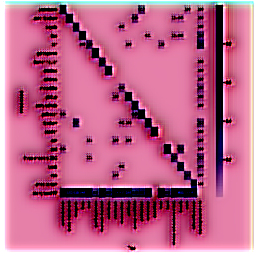

In [18]:
Image.fromarray(output_image.astype('uint8'),'RGB')